# Import

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# Data Preparation

In [2]:
data = pd.read_csv('dataset.csv')
data.head(26)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.tail()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4919,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for col in data.columns:
    data[col] = data[col].str.replace('_', ' ')

In [5]:
data = shuffle(data, random_state=42).reset_index(drop=True)

In [6]:
data.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Acne,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,stomach bleeding,chest pain,chest pain,loss of smell,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [7]:
null_checker = data.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


In [8]:
cols = data.columns

data_ = data[cols].values.flatten()

reshaped = pd.Series(data_)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(data.shape)

data = pd.DataFrame(reshaped, columns = data.columns)

In [9]:
data = data.fillna(0)
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


In [10]:
data.isnull().sum()

Disease       0
Symptom_1     0
Symptom_2     0
Symptom_3     0
Symptom_4     0
Symptom_5     0
Symptom_6     0
Symptom_7     0
Symptom_8     0
Symptom_9     0
Symptom_10    0
Symptom_11    0
Symptom_12    0
Symptom_13    0
Symptom_14    0
Symptom_15    0
Symptom_16    0
Symptom_17    0
dtype: int64

In [11]:
df_severity = pd.read_csv('Symptom-severity.csv')
df_severity['Symptom'] = df_severity['Symptom'].str.replace('_',' ')
df_severity.head()

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


In [12]:
df_severity.tail()

,Symptom,weight
128,inflammatory nails,2
129,blister,4
130,red sore around nose,2
131,yellow crust ooze,3
132,prognosis,5


In [13]:
df_severity.isnull().sum()

Symptom    0
weight     0
dtype: int64

In [14]:
df_severity['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [15]:
vals = data.values
symptoms = df_severity['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df_severity[df_severity['Symptom'] == symptoms[i]]['weight'].values[0]

In [16]:
df_processed = pd.DataFrame(vals, columns=cols)

In [17]:
df_processed = df_processed.replace('dischromic  patches', 0)
df_processed = df_processed.replace('spotting  urination', 0)
df_processed = df_processed.replace('foul smell of urine', 0)

In [18]:
selected = df_processed.iloc[:, 1:]
selected = selected.astype(str)
unique_values = np.unique(selected.values.flatten())
print(unique_values)

['0' '1' '2' '3' '4' '5' '6' '7']


In [19]:
label_encoder = LabelEncoder()
df_processed['Disease'] = label_encoder.fit_transform(df_processed['Disease'])

In [20]:
df_processed['Disease'].value_counts()

Disease
2     120
34    120
17    120
39    120
28    120
14    120
0     120
18    120
36    120
37    120
10    120
33    120
32    120
15    120
27    120
16    120
11    120
29    120
8     120
26    120
20    120
24    120
4     120
1     120
9     120
23    120
25    120
5     120
19    120
30    120
38    120
12    120
21    120
35    120
3     120
13    120
22    120
7     120
6     120
40    120
31    120
Name: count, dtype: int64

In [21]:
symptoms_vals = df_processed.iloc[:,1:].values
diseases_vals = df_processed['Disease']

In [22]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(diseases_vals)

In [23]:
diseases_vals = tf.expand_dims(diseases_vals, axis=-1)

In [25]:
X_train = symptoms_vals[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = diseases_vals[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(3936, 17)
(3936, 1)


In [26]:
X_val = symptoms_vals[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = diseases_vals[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(492, 17)
(492, 1)


In [27]:
X_test = symptoms_vals[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = diseases_vals[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(492, 17)
(492, 1)


In [28]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))
train_dataset = train_dataset.shuffle(buffer_size = 12,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [29]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size = 12,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

# Model Creation and Training

In [30]:
model = tf.keras.Sequential([
                            InputLayer(input_shape = (17,)),
                            Dense(128, activation = "relu"),
                            Dense(128, activation = "relu"),
                            Dense(128, activation = "relu"),
                            Dense(128, activation = "relu"),
                            Dense(128, activation = "relu"),
                            Dense(128, activation = "relu"),
                            Dense(128, activation = "relu"),
                            Dense(1),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2304      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               1

In [31]:
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

In [32]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 150, verbose = 1)

Epoch 1/150
123/123 [==============================] - 3s 8ms/step - loss: 8.9602 - root_mean_squared_error: 11.7244 - val_loss: 6.1400 - val_root_mean_squared_error: 8.5847
Epoch 2/150
123/123 [==============================] - 1s 5ms/step - loss: 5.1927 - root_mean_squared_error: 7.5725 - val_loss: 4.2233 - val_root_mean_squared_error: 6.8803
Epoch 3/150
123/123 [==============================] - 1s 6ms/step - loss: 4.3300 - root_mean_squared_error: 6.6176 - val_loss: 3.9372 - val_root_mean_squared_error: 6.4575
Epoch 4/150
123/123 [==============================] - 1s 10ms/step - loss: 3.4867 - root_mean_squared_error: 5.7205 - val_loss: 3.2160 - val_root_mean_squared_error: 5.6084
Epoch 5/150
123/123 [==============================] - 1s 8ms/step - loss: 3.1809 - root_mean_squared_error: 5.1321 - val_loss: 2.7256 - val_root_mean_squared_error: 5.1979
Epoch 6/150
123/123 [==============================] - 1s 8ms/step - loss: 2.5860 - root_mean_squared_error: 4.3881 - val_loss: 2.971

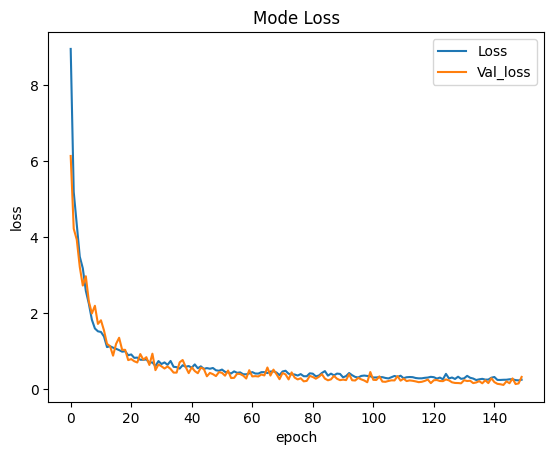

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Mode Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Loss', 'Val_loss'])
plt.show()

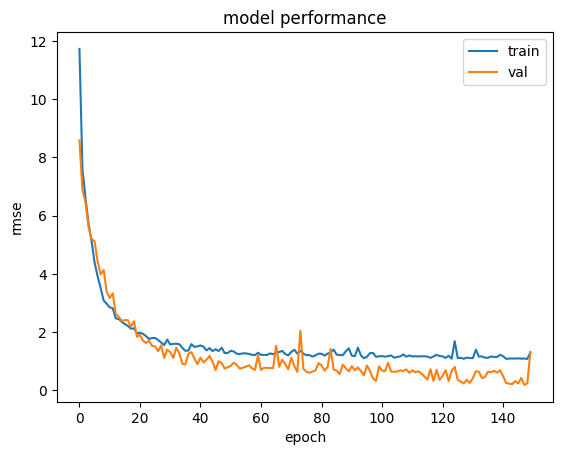

In [34]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

# Model Evaluation and Testing

In [35]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 11ms/step - loss: 0.3319 - root_mean_squared_error: 1.6512


[0.33190086483955383, 1.651159644126892]

In [36]:
model.predict(tf.expand_dims(X_test[0], axis=0)).round()

1/1 [==============================] - 0s 340ms/step


array([[35.]], dtype=float32)

In [37]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([35])>

In [38]:
y_true = list(y_test[:,0].numpy())

In [39]:
y_pred = list(model.predict(X_test)[:, 0].round())

16/16 [==============================] - 0s 5ms/step


In [40]:
y_pred = [int(value) for value in y_pred]
for i in range(len(y_pred)):
    if y_pred[i] >= 41:
        y_pred[i] = 40
predicted_disease = label_encoder.inverse_transform(y_pred)
print(predicted_disease)

['Psoriasis' 'Hepatitis C' 'Malaria' 'Heart attack' 'Hypoglycemia'
 'Urinary tract infection' 'Hypothyroidism' 'Psoriasis' 'Chicken pox'
 'Fungal infection' 'Acne' 'Hypothyroidism' 'Hepatitis C'
 'Chronic cholestasis' 'Urinary tract infection'
 'Paralysis (brain hemorrhage)' 'Tuberculosis' 'Hyperthyroidism'
 'Hypoglycemia' 'Jaundice' 'Urinary tract infection' 'Hypertension'
 'Alcoholic hepatitis' 'Hypoglycemia' 'Osteoarthristis'
 'Alcoholic hepatitis' 'Dimorphic hemmorhoids(piles)' 'Pneumonia'
 'Alcoholic hepatitis' 'Jaundice' 'Hypertension' 'Arthritis'
 'Varicose veins' 'Dengue' 'Allergy' 'Jaundice' 'Urinary tract infection'
 'Psoriasis' 'Peptic ulcer diseae' 'Allergy' 'Hepatitis B' 'Typhoid'
 'Chicken pox' 'Chronic cholestasis' 'Tuberculosis' 'Arthritis' 'Acne'
 'Urinary tract infection' 'Hyperthyroidism' 'Cervical spondylosis'
 'Bronchial Asthma' 'Osteoarthristis' 'Hepatitis B' 'Varicose veins'
 'Psoriasis' 'Malaria' 'Chronic cholestasis' 'Hepatitis C' 'Common Cold'
 'Hepatitis B' '

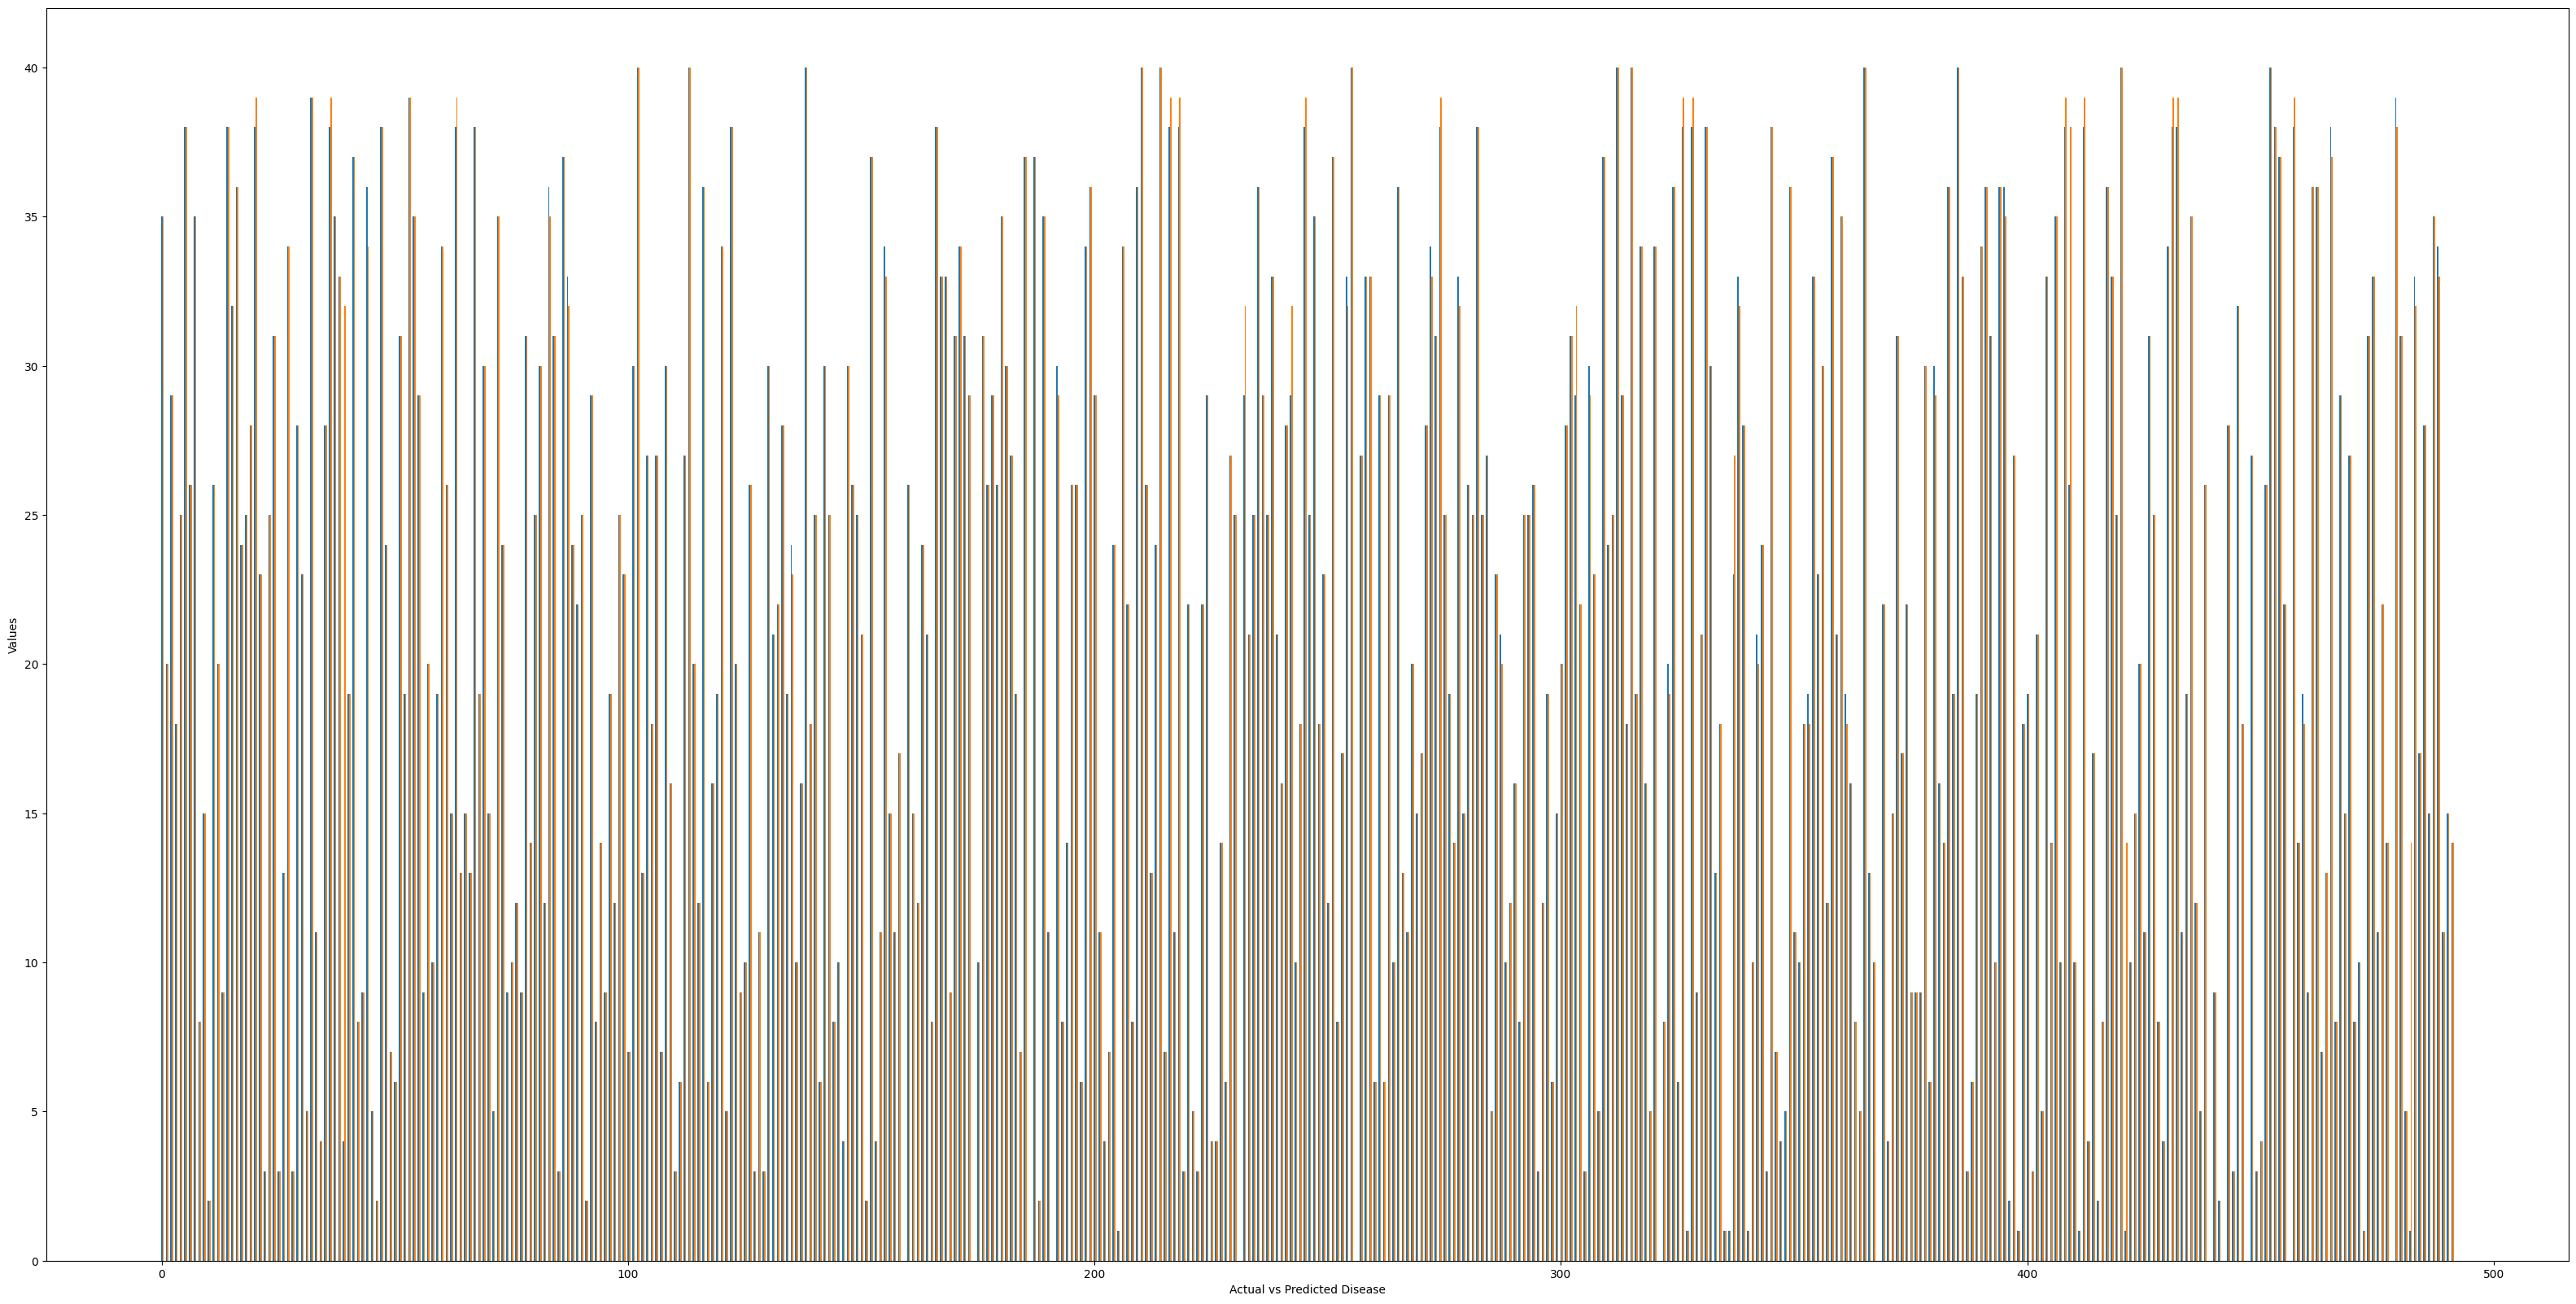

In [41]:
ind = np.arange(492)
plt.figure(figsize=(40,20))

width = 0.3

plt.bar(ind, y_pred, width, label='Predicted Disease')
plt.bar(ind + width, y_true, width, label='Actual Disease')

plt.xlabel('Actual vs Predicted Disease')
plt.ylabel('Values')

plt.show()

In [42]:
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy:', accuracy*100)

Accuracy: 90.85365853658537


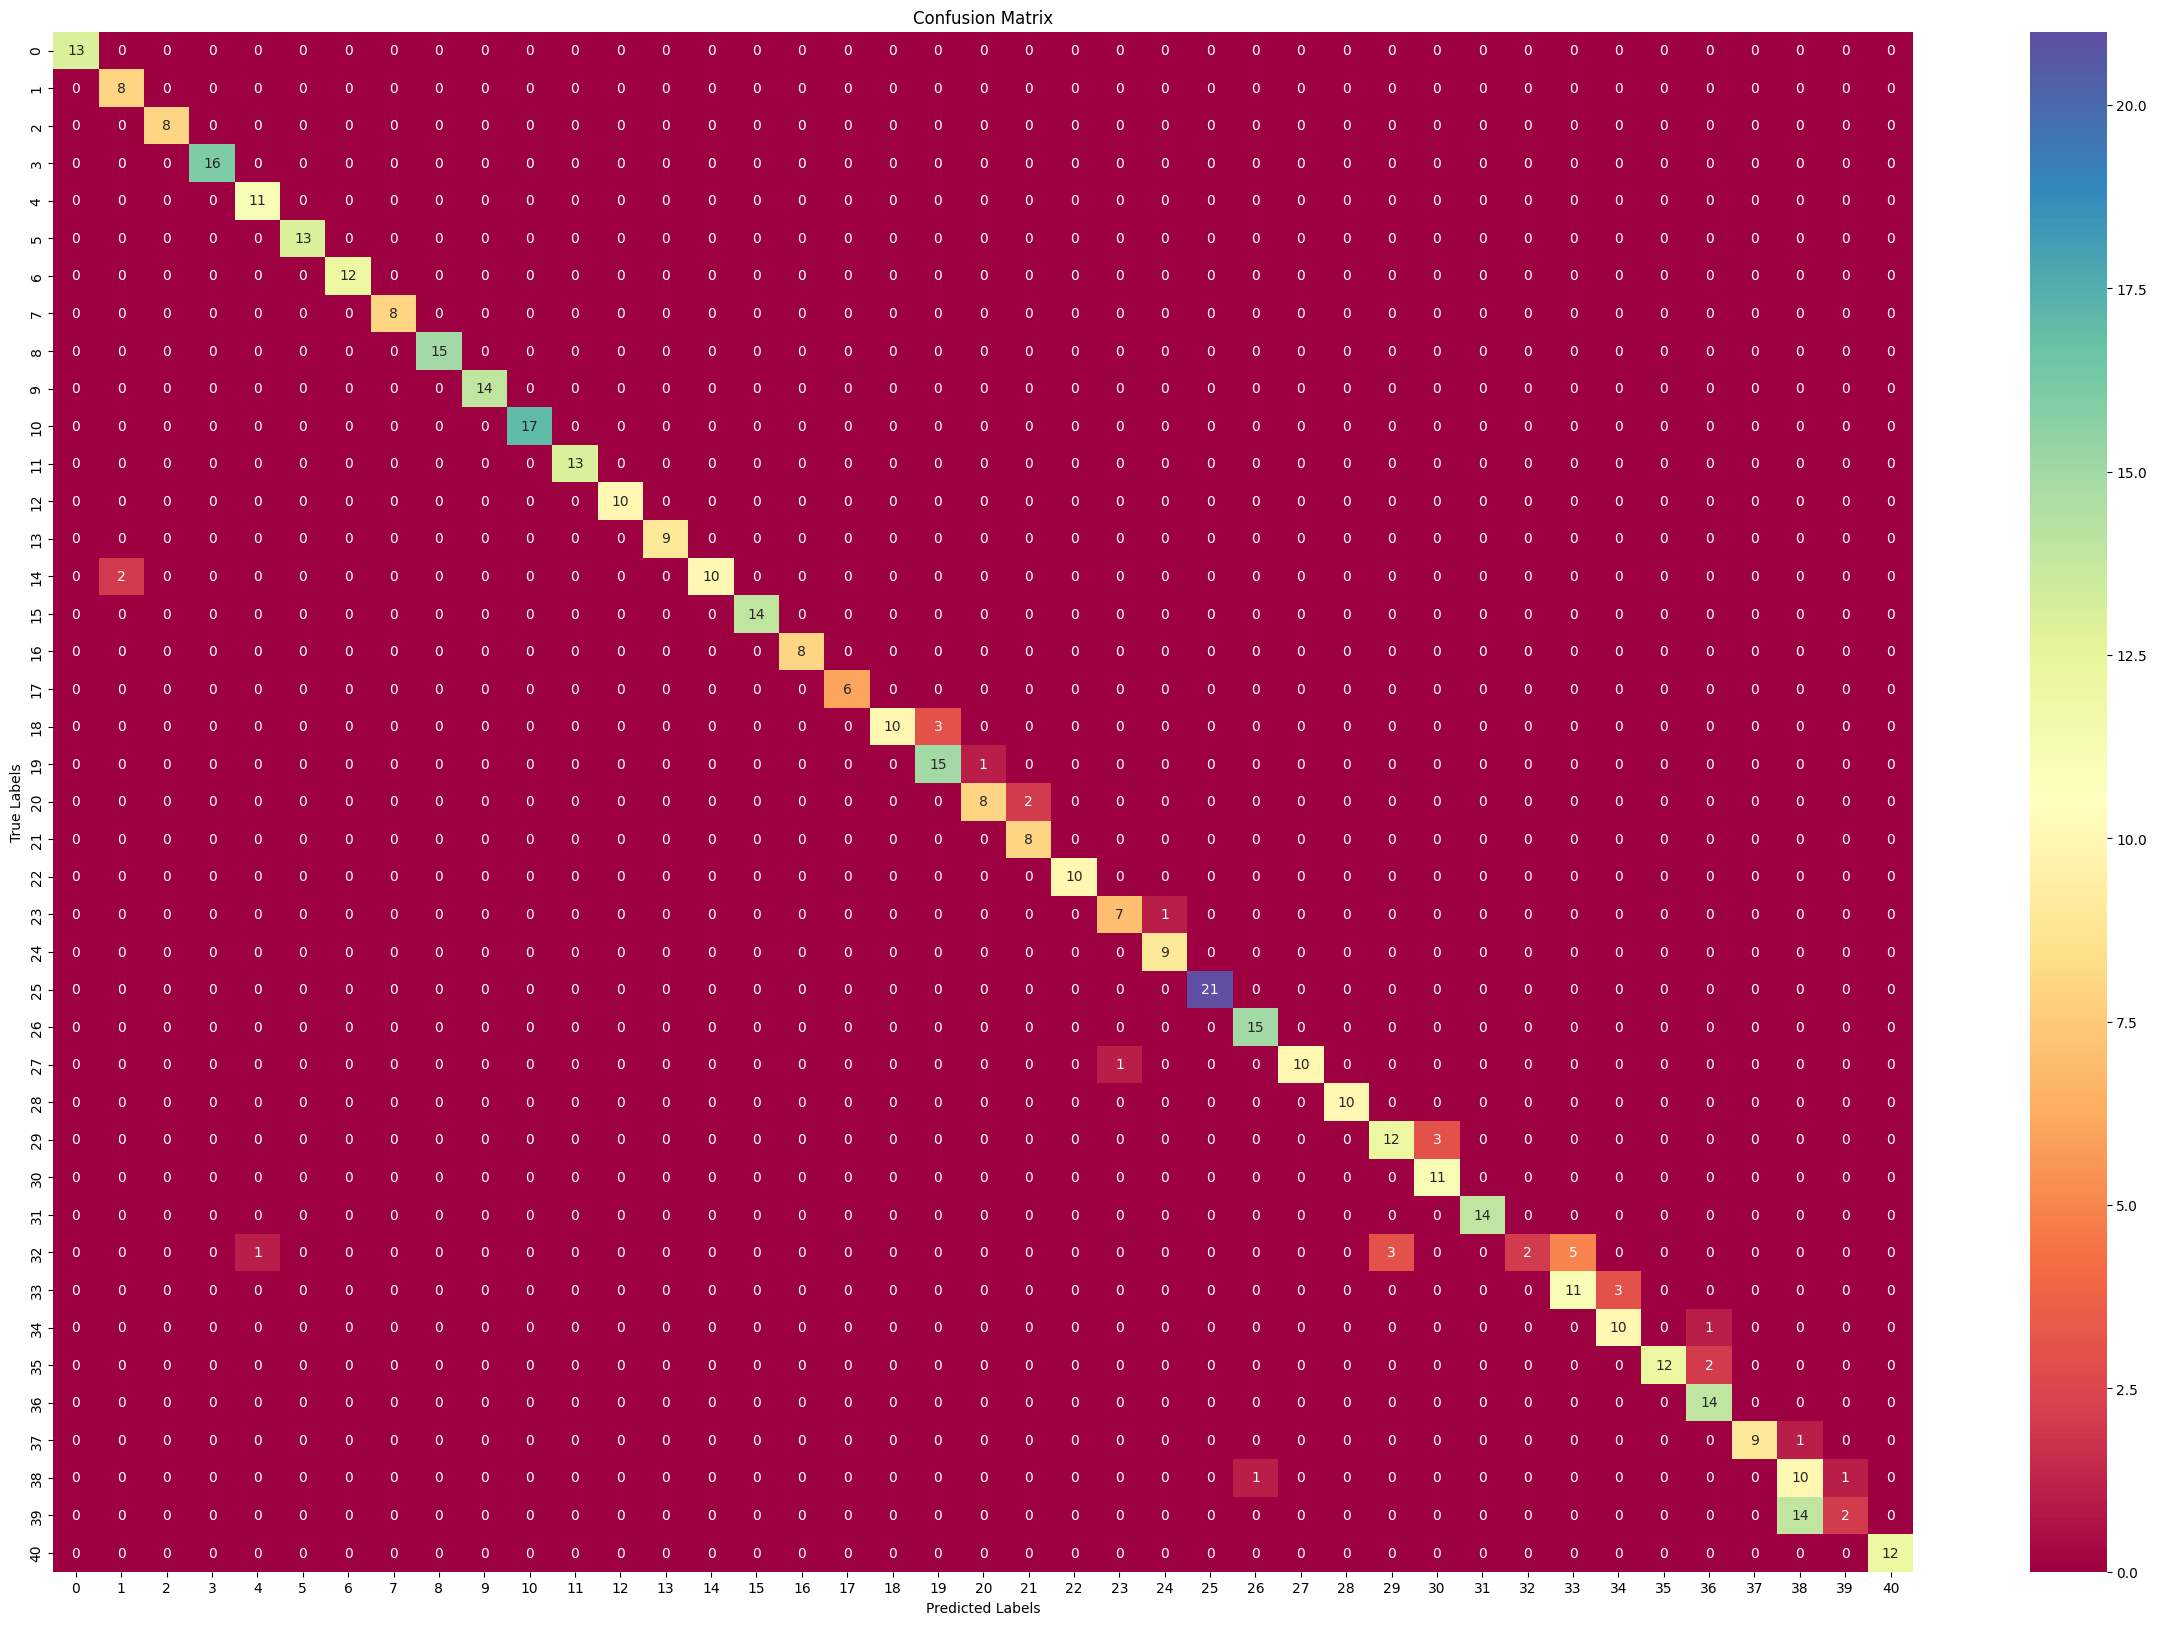

In [43]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(30,20))
sns.heatmap(cm, annot=True, cmap='Spectral')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [44]:
predicted_disease_series = pd.Series(predicted_disease)
predicted_disease_series.value_counts()

Urinary tract infection                    25
Hypoglycemia                               21
Hepatitis B                                18
Tuberculosis                               17
Common Cold                                17
Hypothyroidism                             16
Peptic ulcer diseae                        16
Alcoholic hepatitis                        16
Malaria                                    15
Chicken pox                                15
Chronic cholestasis                        14
Fungal infection                           14
Osteoarthristis                            14
Migraine                                   14
Pneumonia                                  13
Arthritis                                  13
Dengue                                     13
(vertigo) Paroymsal  Positional Vertigo    13
Bronchial Asthma                           12
hepatitis A                                12
Allergy                                    12
Psoriasis                         

In [45]:
predicted_disease_series.describe()

count                         492
unique                         41
top       Urinary tract infection
freq                           25
dtype: object